In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [152]:
t_step = 0.001
t_max = 500
t = np.arange(0, t_max, t_step)

In [3]:
# 2-1
init_pop = 1
growth_rate = 1.01
birth_rate = 1.05
death_rate = 1.0

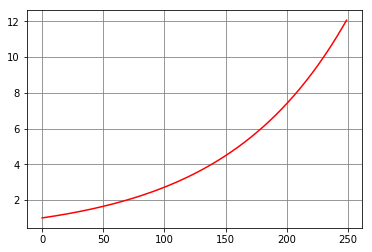

In [4]:
# 2-1-1
result = odeint(lambda pop, t: (growth_rate - 1) * pop, init_pop, t)
plt.plot(t, result[:], label='result1', color='red')
plt.grid(which='major',color='gray',linestyle='-')

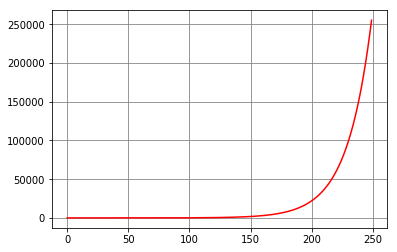

In [5]:
# 2-1-2
result = odeint(lambda pop, t: (birth_rate - death_rate) * pop, init_pop, t)
plt.plot(t, result[:], label='result1', color='red')
plt.grid(which='major',color='gray',linestyle='-')

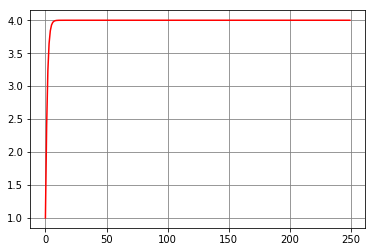

In [6]:
# ODE sample
a = 5.0
b = 1.0

def dpopdt(pop):
    return a * pop / (b + pop) - death_rate * pop

result = odeint(lambda pop, t: dpopdt(pop), init_pop, t)
plt.plot(t, result[:], label='result1', color='red')
plt.grid(which='major',color='gray',linestyle='-')

In [180]:
# 2-3
# 2 pray -> 3 pray
# 1 pray + 1 predator -> 2 predator

prey_increase_rate = 0.5 #k1
predator_death_rate = 0.1 #k3
hunting_rate = 1.0
prey_to_predator_rate = 1.0 #k2

init_prey = 0.0 # k3/k2 -> steady state
init_predator = 0.1 #k1/k2 -> steady state
init_grass = 1.0
init_state = [init_prey, init_predator, init_grass]

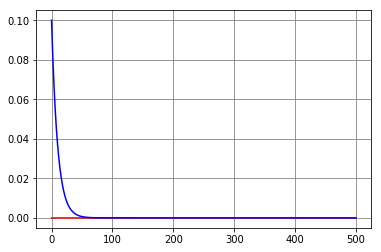

In [181]:
# 2-3-1
def model1(state, t):
    dprey_dt = prey_increase_rate * state[0] - hunting_rate * state[0] * state[1]
    dpredator_dt = hunting_rate * prey_to_predator_rate * state[0] * state[1] - predator_death_rate * state[1]
    return [dprey_dt, dpredator_dt, 0]

result1 = odeint(model1, init_state, t)
plt.plot(t, result1[:,0], label='prey', color='red')
plt.plot(t, result1[:,1], label='predator', color='blue')
plt.grid(which='major',color='gray',linestyle='-')

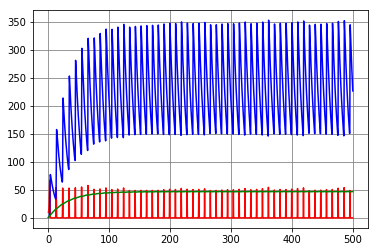

In [165]:
# 2-3-2
prey_death_rate = 0.01
grass_birth_emergency = 5.0
grass_birth = 1.5
grass_consumption = 0.001
grass_death = 0.03

def model2(state, t):
    #prey_increase_rate_new = prey_increase_rate if state[2] > state[0] else prey_increase_rate - 0.1
    dprey_dt = (prey_increase_rate*state[2] - prey_death_rate) * state[0] - hunting_rate * state[0] * state[1]
    dpredator_dt = hunting_rate * prey_to_predator_rate * state[0] * state[1] - predator_death_rate * state[1]
    dgrass_dt = (grass_birth_emergency if state[2] <= 0 else grass_birth) - (state[0] * grass_consumption + grass_death)*state[2]
    return [dprey_dt, dpredator_dt, dgrass_dt]

result2 = odeint(model2, init_state, t)
plt.plot(t, result2[:,0], label='prey', color='red')
plt.plot(t, result2[:,1], label='predator', color='blue')
plt.plot(t, result2[:,2], label='grass', color='green')
plt.grid(which='major',color='gray',linestyle='-')